In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import sys

sys.path.append(os.path.abspath("../"))
from dataset import DS_NAMES
from dataset import DS_DIMENSIONS
from utilities.figure_tools import get_latest_results_directory, make_fig_directory, load_results

cmap = plt.get_cmap("Set1")
colors = cmap.colors

results_path = "../results/turing/vary_ntrees_softaxilf.csv"
output_dir = "./vary-ntrees-softaxilf/"
export_figures = True
fig_type = ".pdf"
use_titles = False
use_legend = True

if export_figures and not os.path.isdir(output_dir):
    os.makedirs(output_dir)

In [24]:
all_results = pd.read_csv(results_path).groupby(["dataset", "explainer", "n_trees"]).mean().reset_index()
print("explainers:", list(all_results["explainer"].unique()))
print("datasets", list(all_results["dataset"].unique()))
all_results.head()

explainers: ['FACETIndex', 'OCEAN']
datasets ['cancer', 'glass', 'magic', 'spambase', 'vertebral']


,dataset,explainer,n_trees,iteration,max_depth,accuracy,precision,recall,f1,per_valid,avg_dist,avg_length,prep_time,explain_time,sample_time,n_explain
0,cancer,FACETIndex,10,2.5,5.0,0.938596,0.930088,0.896271,0.912237,0.883333,0.165908,4.234798,4.261674,0.367342,0.018367,20.0
1,cancer,FACETIndex,50,2.5,5.0,0.944444,0.936709,0.905049,0.920344,1.000000,0.297160,9.766667,17.097875,2.284664,0.114233,20.0
2,cancer,FACETIndex,100,2.5,5.0,0.947368,0.940491,0.909951,0.924765,1.000000,0.359339,12.975000,25.778737,3.059731,0.152987,20.0
3,cancer,FACETIndex,200,2.5,5.0,0.947368,0.945689,0.905049,0.924509,1.000000,0.412644,16.325000,42.344326,3.607002,0.180350,20.0
4,cancer,FACETIndex,300,2.5,5.0,0.944444,0.938601,0.905049,0.920967,1.000000,0.438047,18.158333,58.676667,3.909992,0.195500,20.0


In [25]:
all_results["n_trees"].unique()

array([ 10,  50, 100, 200, 300, 400, 500], dtype=int64)

In [26]:
# idx_match = all_results["n_trees"] == 10
# all_results[idx_match].to_csv("temp_table.csv", index=False)

In [27]:
cmap = plt.get_cmap("tab10")
colors = cmap.colors
ds_colors = {
    "cancer": colors[0],
    "glass": colors[1],
    "magic": colors[2],
    "spambase": colors[3],
    "vertebral": colors[4]
}
epl_colors = {
    "AFT": colors[0],
    "FACETIndex": colors[1],
    "OCEAN": colors[2],
    "RFOCSE": colors[3],
    "MACE": colors[4]
}
explainer_markers = {
    "AFT": "o",
    "FACETIndex": "^",
    "OCEAN": "s",
    "RFOCSE": "v",
    "MACE": "D"
}
marker_size = 8
line_width = 2
marker_sizes = {
    "AFT": marker_size,
    "FACETIndex": marker_size,
    "OCEAN": marker_size,
    "RFOCSE": marker_size,
    "MACE": marker_size
}

In [28]:
def render_plot(xfeature, yfeature, xlabel, ylabel, title, save_name=None, xrange=None, yrange=None, xlog=False, lloc=None, ylog=False):

    for ds in all_results["dataset"].unique():
        plt.figure()
        is_ds = all_results["dataset"] == ds
        for expl in all_results["explainer"].unique():
            is_expl = all_results["explainer"] == expl
            matching_rows = is_ds & is_expl
            plt.plot(all_results[matching_rows][xfeature], all_results[matching_rows][yfeature], label=expl, marker=explainer_markers[expl], lw=line_width, ms=marker_sizes[expl])

        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        if use_titles:
            plt.title(ds)
        if use_legend:
            plt.legend(loc="best")
        if ylog:
            plt.yscale('log')
        if xrange is not None:
            plt.xlim(xrange)
        if yrange is not None:
            plt.ylim(yrange)
        if export_figures and save_name is not None:
            plt.savefig(output_dir + save_name + "_" + ds + fig_type, bbox_inches="tight")

In [29]:
df = all_results[all_results["n_trees"] == 100]
df_ocean = df[df["explainer"] == "OCEAN"]
df_facet = df[df["explainer"] == "FACETIndex"]
ocean_dist = df_ocean["avg_dist"].to_numpy()
facet_dist = df_facet["avg_dist"].to_numpy()

print(df_facet["dataset"].to_numpy())
to_ocean = facet_dist / ocean_dist
print(to_ocean)
prev_results = [2.28858939, 2.0159912, 1.87535734, 10.16738057, 1.46097089]
print(prev_results) # untuned values
print(to_ocean / prev_results)

['cancer' 'glass' 'magic' 'spambase' 'vertebral']
[1.61442052 2.05319392 1.27508577 6.39762898 1.11695245]
[2.28858939, 2.0159912, 1.87535734, 10.16738057, 1.46097089]
[0.70542166 1.01845381 0.67991617 0.6292308  0.76452752]


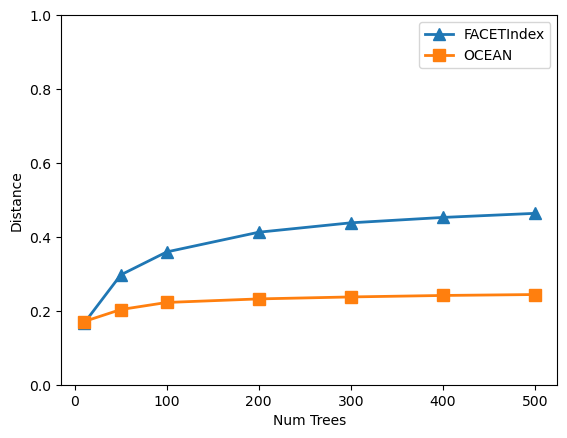

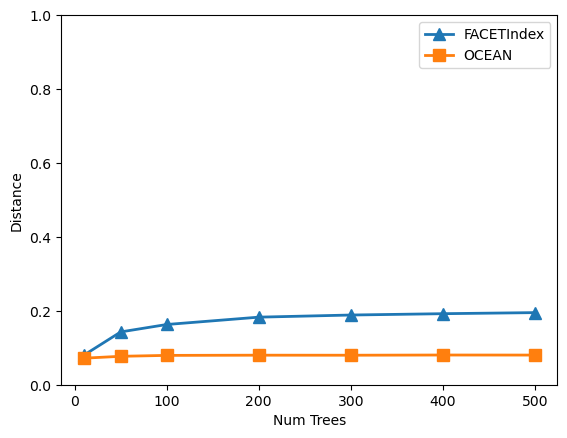

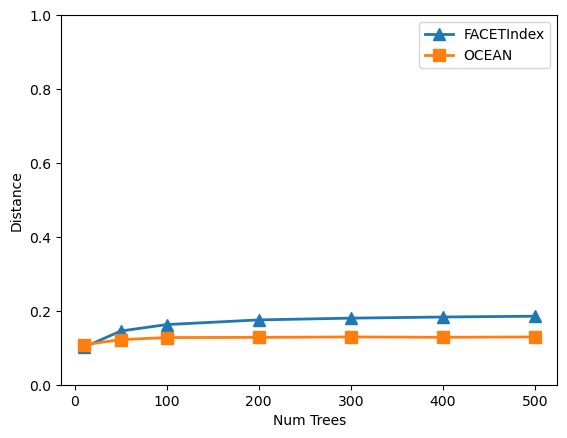

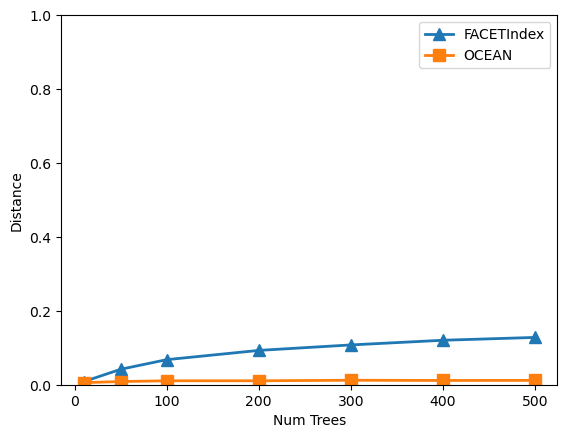

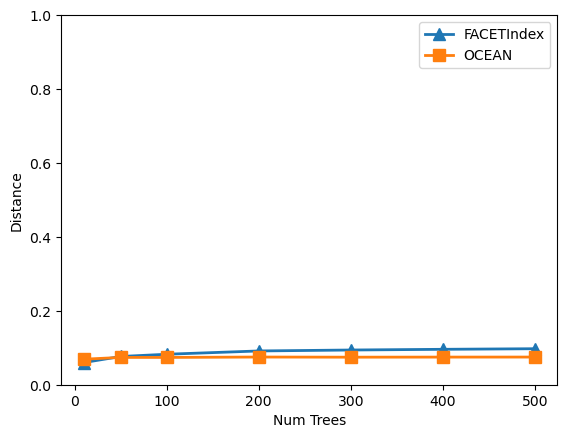

In [30]:
render_plot("n_trees", "avg_dist", "Num Trees", "Distance", "Average Distance vs Num Trees", save_name="ntrees_dist", yrange=[0,1])

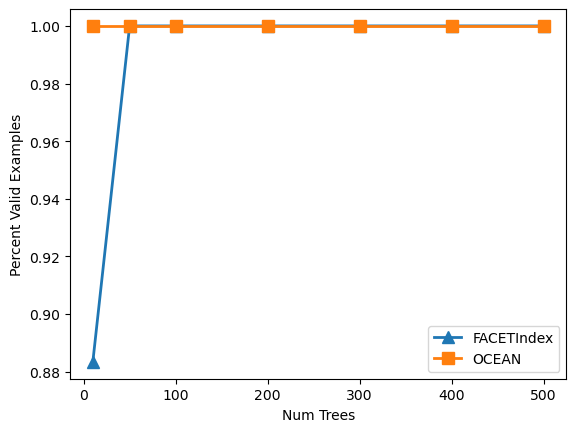

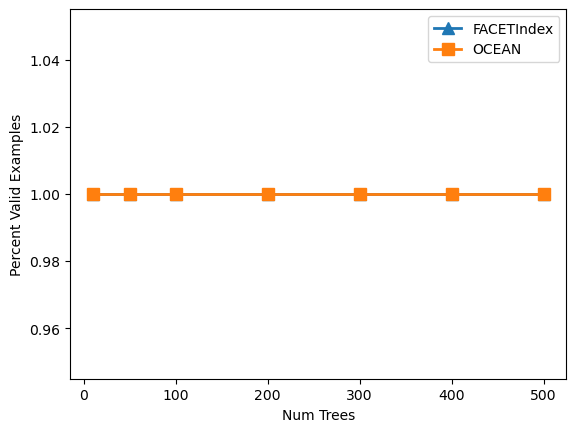

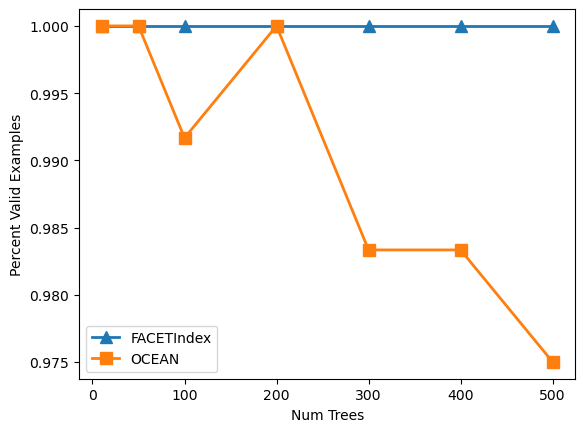

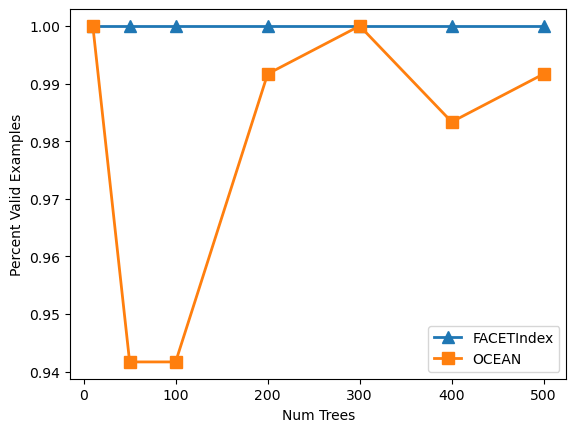

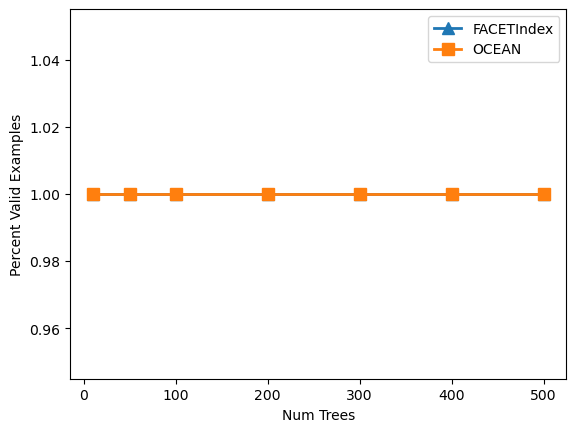

In [31]:
render_plot("n_trees", "per_valid", "Num Trees", "Percent Valid Examples", "Percent Valid Examples vs Num Trees", save_name="ntrees_valid")

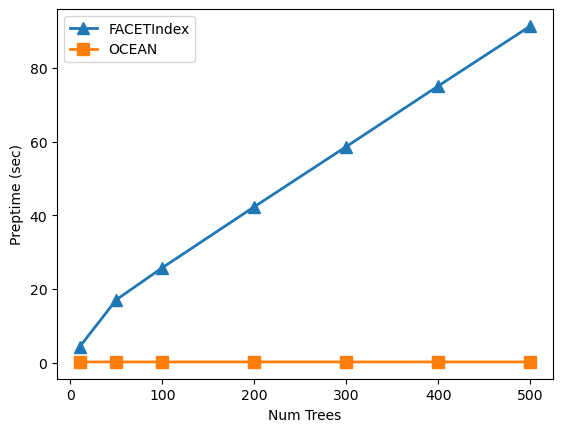

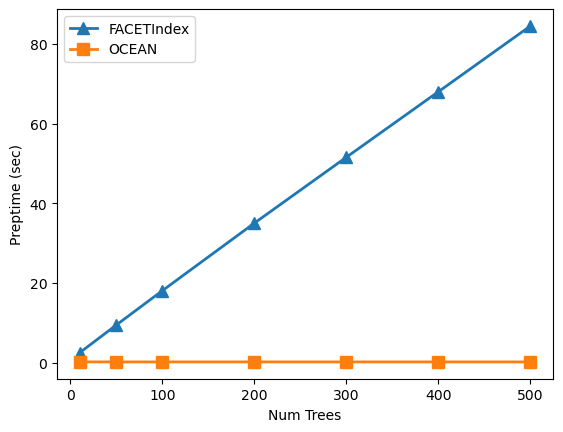

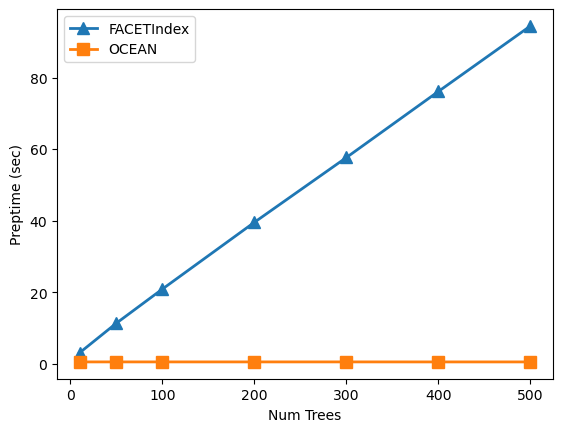

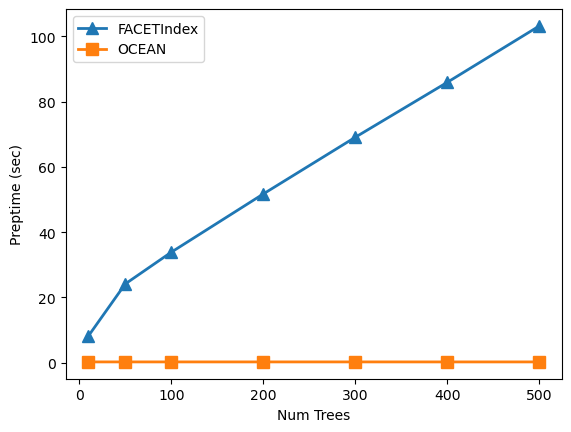

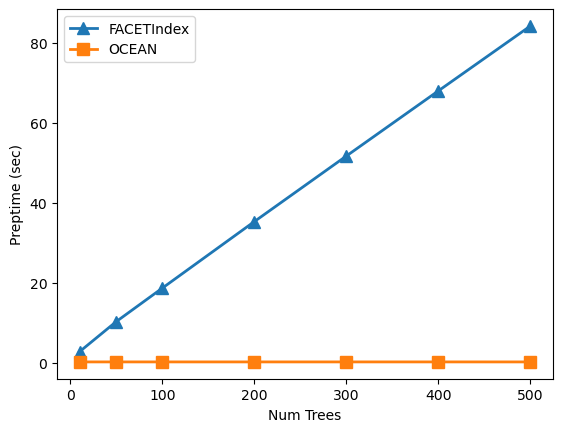

In [32]:
# prep time vs number of trees
render_plot("n_trees", "prep_time", "Num Trees", "Preptime (sec)", "Prep Time vs Num Trees", save_name="ntrees_tprep")

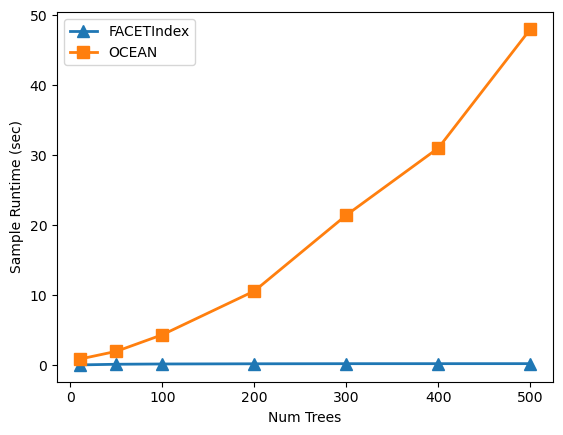

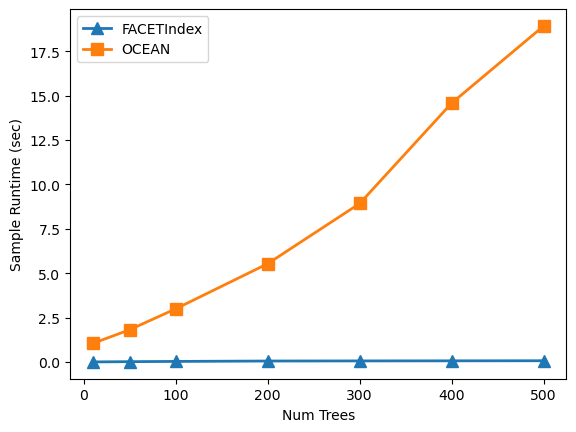

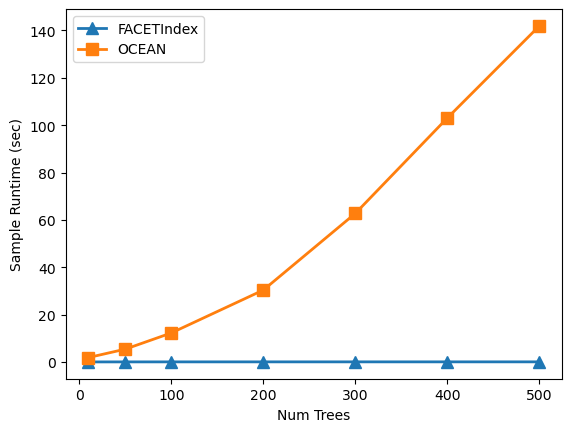

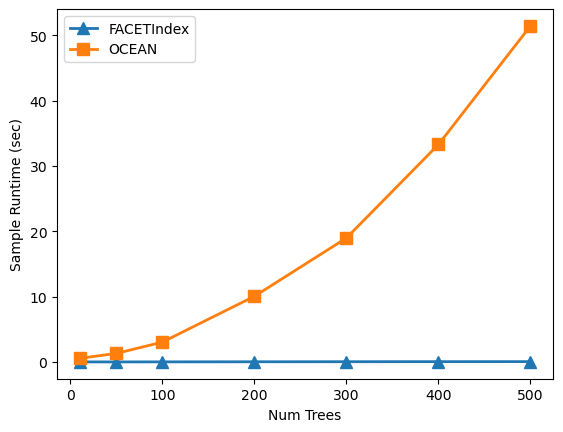

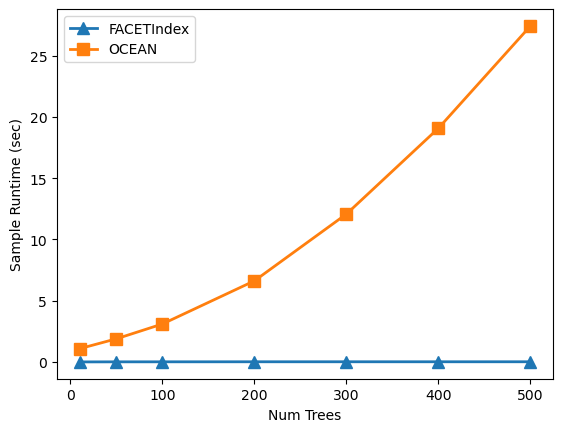

In [33]:
# sample time vs number of trees
render_plot("n_trees", "sample_time", "Num Trees", "Sample Runtime (sec)", "Explanation Time vs Num Trees", save_name="ntrees_texplain", ylog=False) # "sampletime_vs_trees"